# Hashtags study - Novax users

## Import

In [1]:
import pandas as pd
import json

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import importlib
import sys

import url_util as ut
sys.path.insert(0, '../')
import general_utils as gen_ut

## Dataset preparation

In [2]:
df = pd.read_csv('../tweets_novax.csv',low_memory=False,
                 usecols=['urls','created_at'])

In [3]:
df['created_at'] = pd.to_datetime(df['created_at'], format="%a %b %d %X %z %Y")

### Visualizaiton by histogram

In [4]:
dfUrls = ut.df_url_counter(df)
dfUrls = ut.url_credibility('../1_Dataset_preparation/data/credibility.csv',dfUrls)
dfUrls

,count,Class
url,,
twitter.com,113870,none
imolaoggi.it,12893,low
youtube.com,12534,none
iltempo.it,5299,high
ansa.it,3634,high
...,...,...
CAZZATE.MA,1,none
www-adnkronos-com.cdn.ampproject.org,1,none
www-avvenire-it.cdn.ampproject.org,1,none


In [5]:
total = sum(dfUrls['count'])
print('Credibility:')

for c in dfUrls['Class'].unique():
    summation = sum(dfUrls.loc[dfUrls['Class']==c,'count'])
    print('\t%s:\t %d \t %d%%'%(c,summation,summation*100/total))

Credibility:
	none:	 213210 	 72%
	low:	 42988 	 14%
	high:	 36919 	 12%


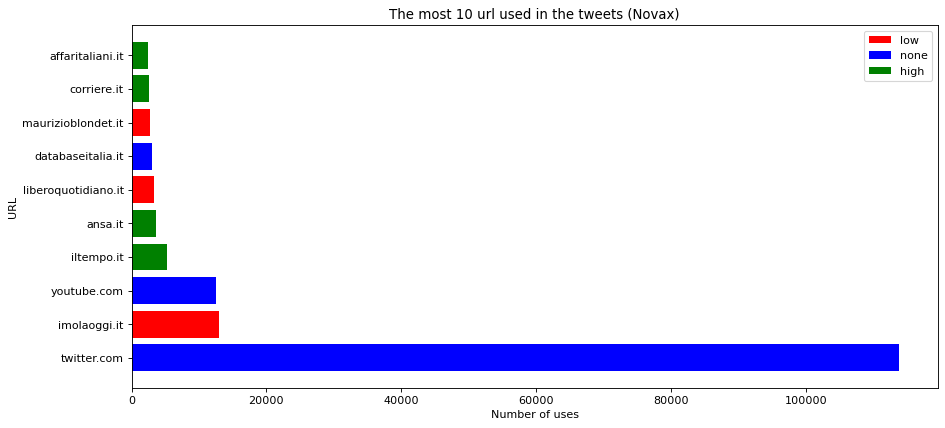

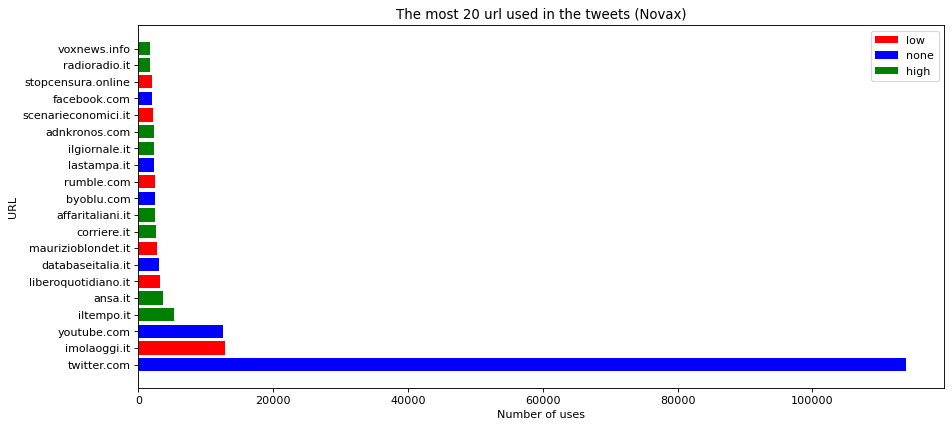

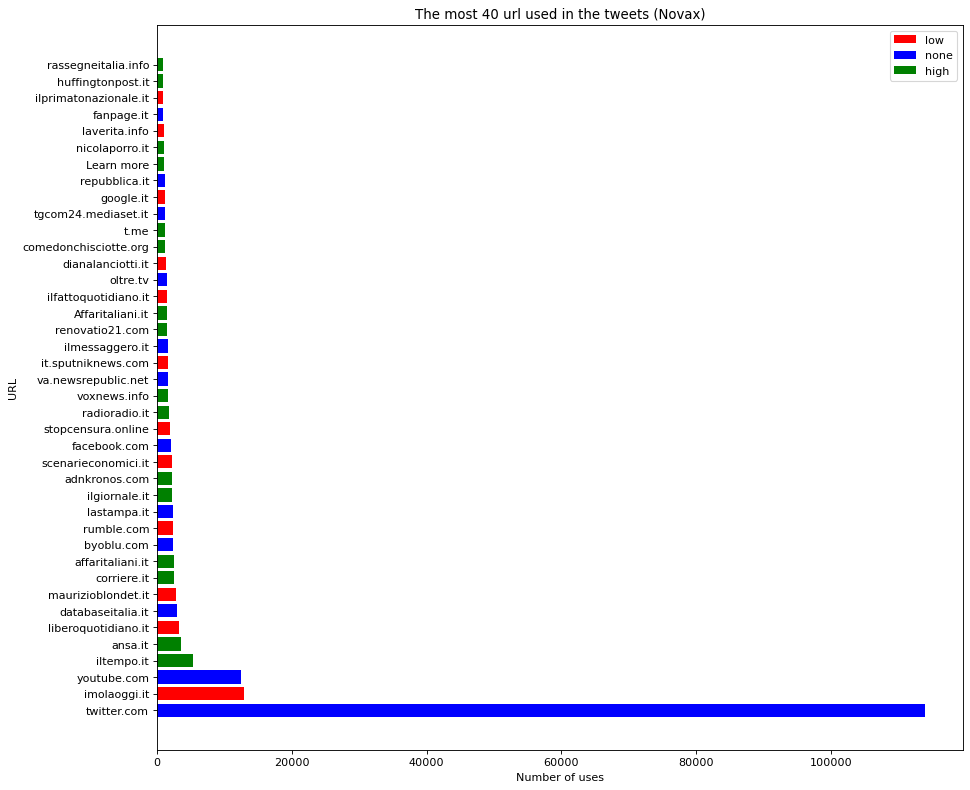

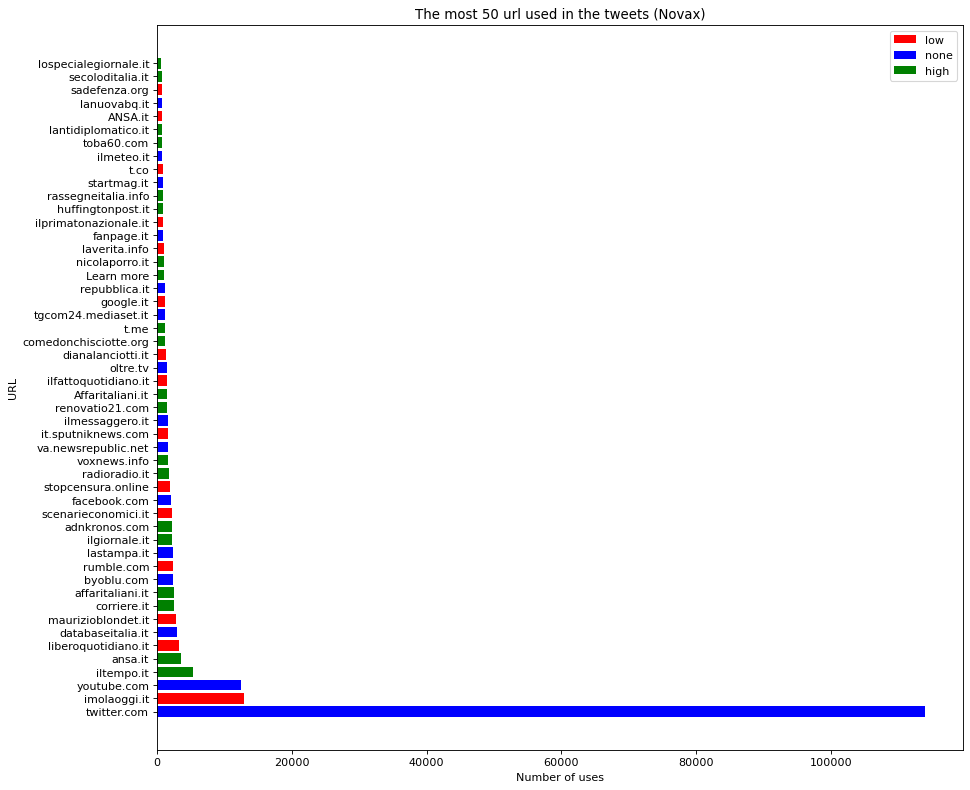

In [6]:
colors = {'low': 'r', 'none': 'b', 'high': 'g'}

for i in (10,20,40,50): 
    if i < 30:
        figure(figsize=(13, 6), dpi=80)
    else:
        figure(figsize=(13, 12), dpi=80)
    
    for n,c in colors.items():
        plt.hist([0],color=c,label=n)
    
    plt.barh(dfUrls.head(i).index,width=dfUrls.head(i)['count'], color=[colors[i] for i in dfUrls.head(10)['Class']])
    plt.legend()

    plt.xlabel('Number of uses')
    plt.ylabel('URL')
    plt.title("The most %d url used in the tweets (Novax)"% i)
    plt.show()

In [7]:
dfUseUrl = ut.process_dfUse(df)
dfUseUrl

,Week/Year,url,count
13201,2020-01-06,ANSA.it,4
13224,2020-01-06,lastampa.it,18
13223,2020-01-06,lascuolacheaccoglie.blogspot.com,81
13222,2020-01-06,informarexresistere.fr,4
13221,2020-01-06,infoautismo.it,1
...,...,...,...
1441,2021-05-17,lewrockwell.com,1
1442,2021-05-17,liberopensiero2019.blogspot.com,15
1443,2021-05-17,liberoquotidiano.it,17
1437,2021-05-17,laverita.info,5


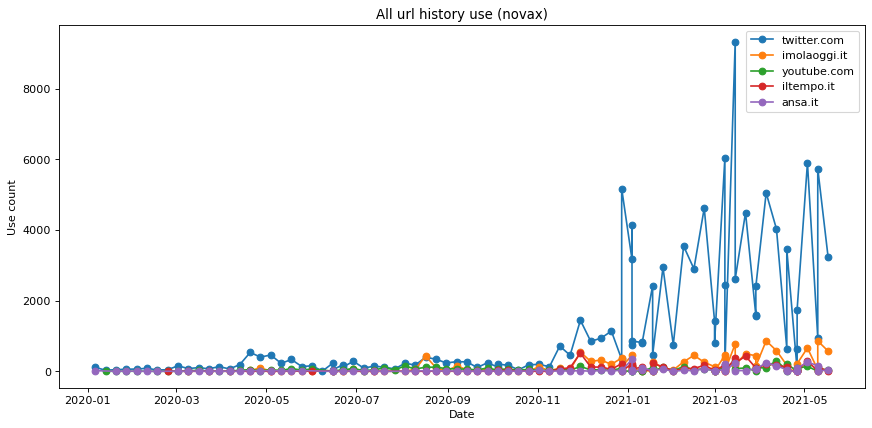

In [8]:
#All in the same graphic
figure(figsize=(13, 6), dpi=80)

for w in dfUrls.head().index:
    mask = dfUseUrl['url'] == w
    plt.plot(dfUseUrl.loc[mask,'Week/Year'],dfUseUrl.loc[mask,'count'],'o-',label=w)

plt.legend()   
plt.title('All url history use (novax)')
plt.xlabel('Date')
plt.ylabel('Use count')

plt.show()

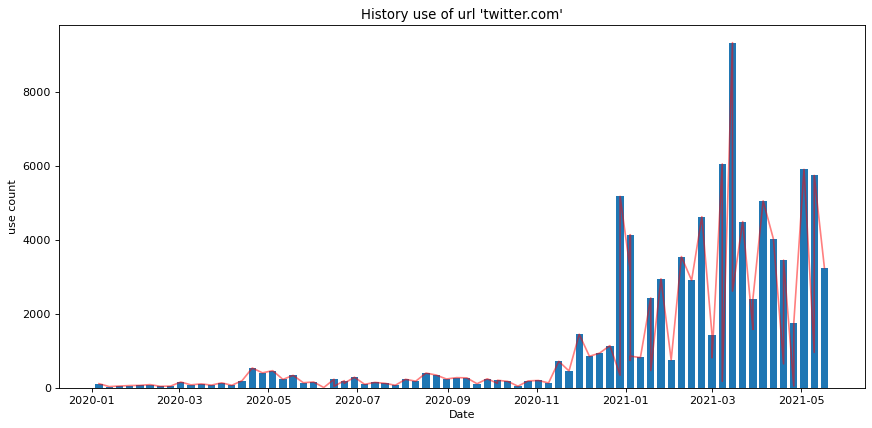

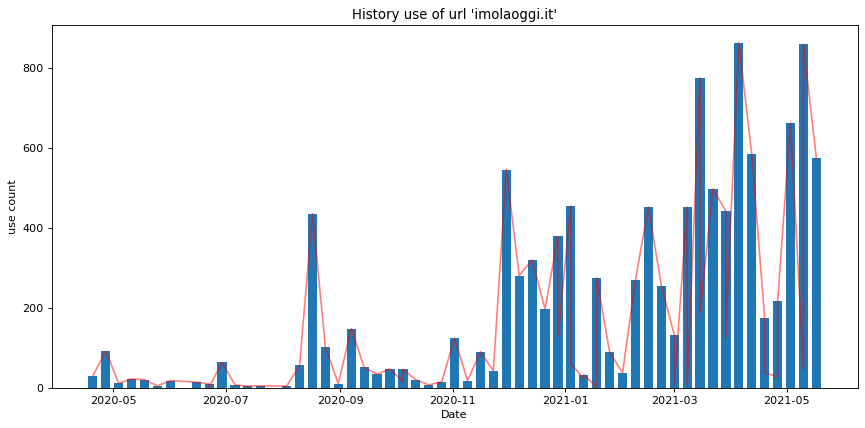

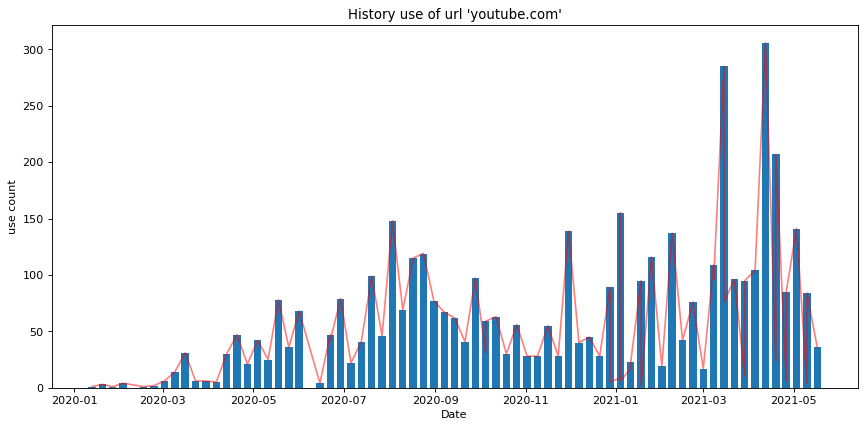

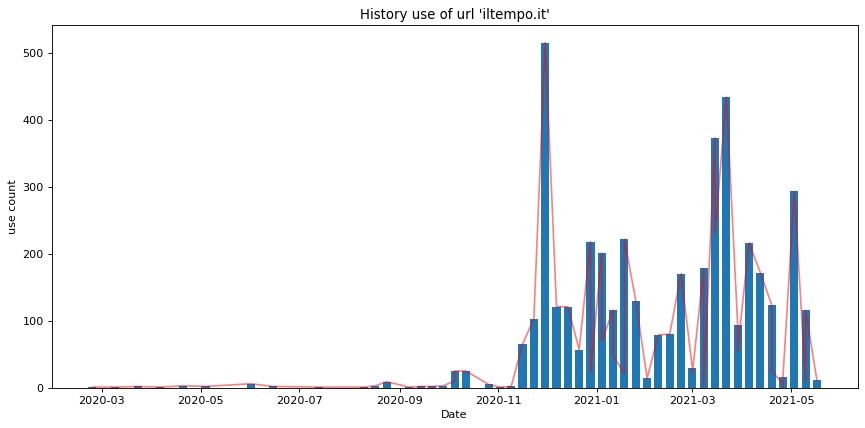

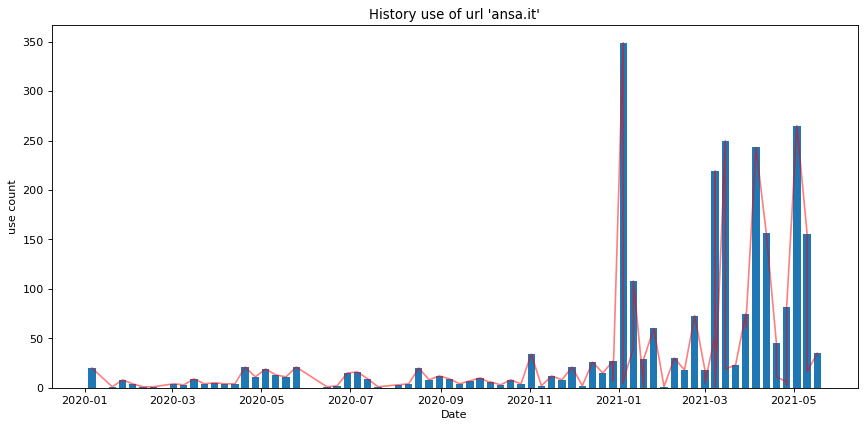

In [9]:
#All in different graphic
for w in dfUrls.head().index:
    mask = dfUseUrl['url'] == w
    figure(figsize=(13, 6), dpi=80)
    
    plt.bar(dfUseUrl.loc[mask,'Week/Year'],height=dfUseUrl.loc[mask,'count'],width=5)
    plt.plot(dfUseUrl.loc[mask,'Week/Year'],dfUseUrl.loc[mask,'count'],color='r',alpha = 0.5)
    
    plt.title("History use of url '%s'"%w)
    plt.xlabel('Date')
    plt.ylabel('use count')

    plt.show()